In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import xgboost
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Desktop/ML--DOCS/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


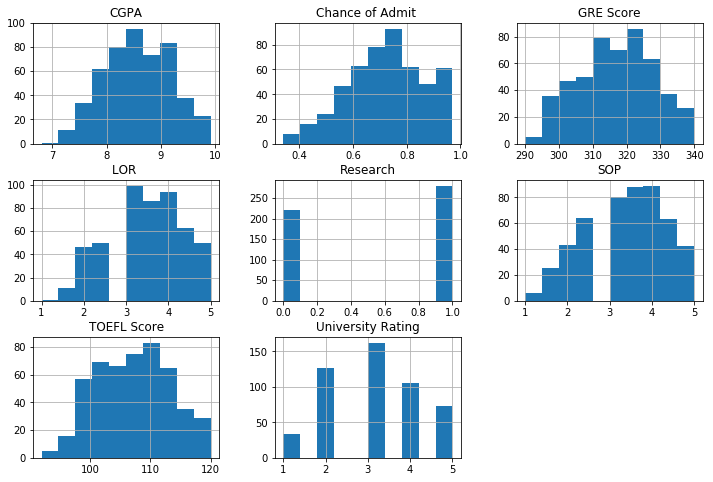

In [4]:
df.pop('Serial No.')
df.hist(figsize=(12,8))
plt.show()

In [5]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


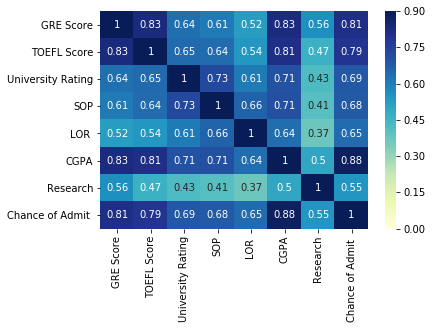

In [8]:
corr=df.corr()
sns.heatmap(corr, vmax=0.9, vmin=0, annot=True, cmap="YlGnBu")
corr

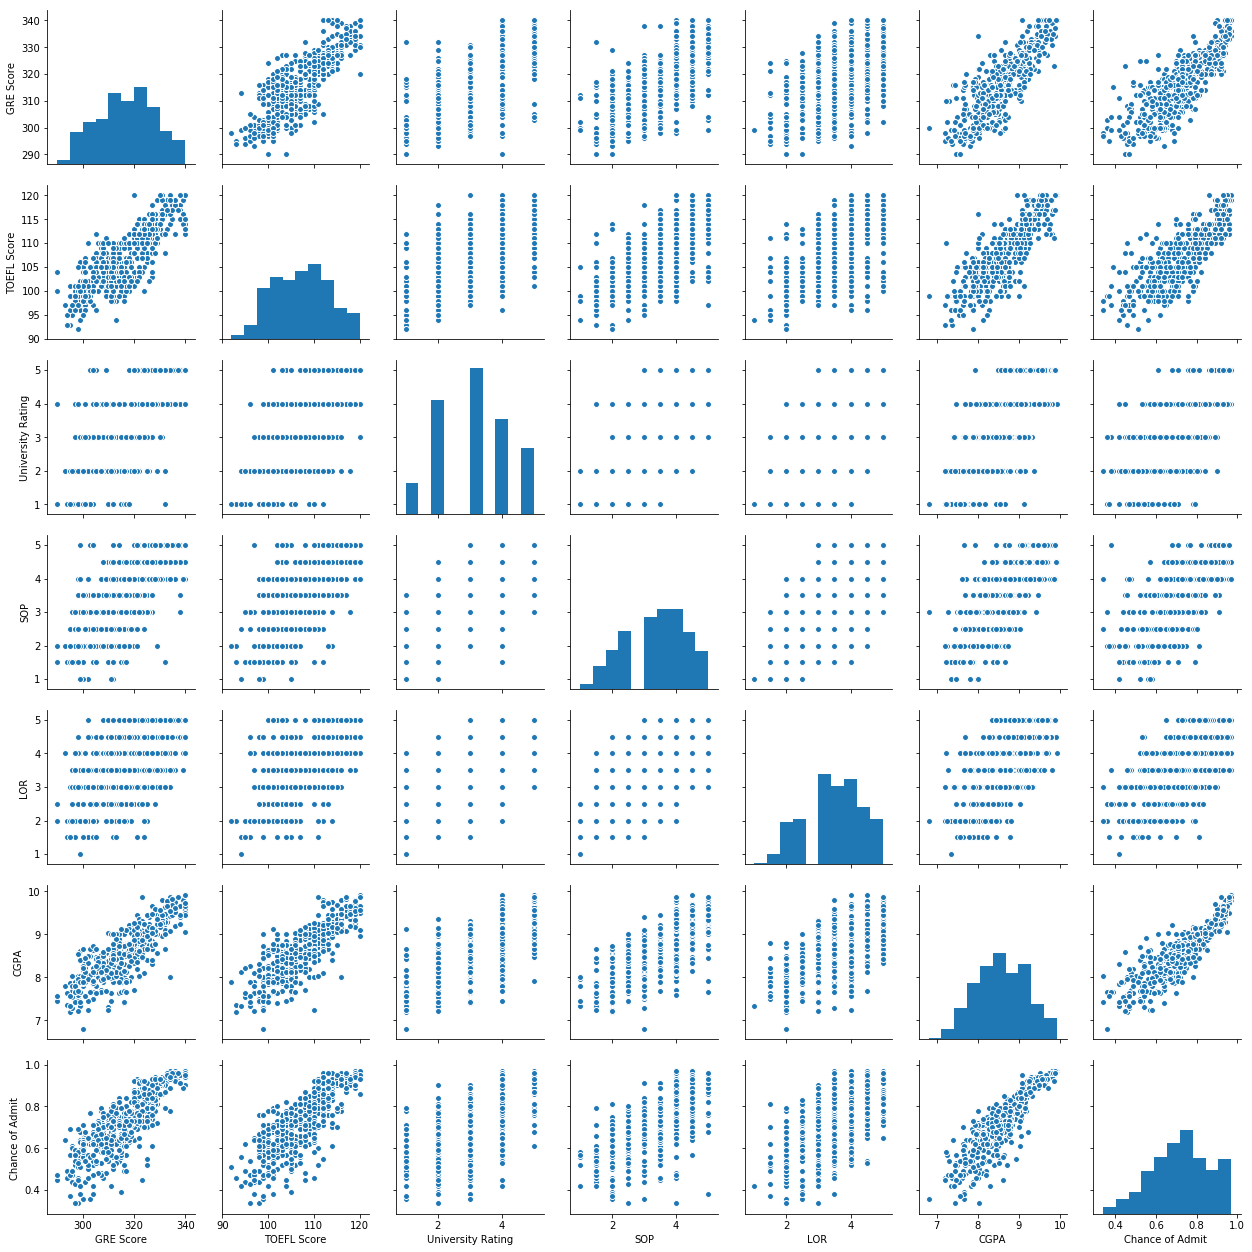

In [9]:
sns.pairplot(df.drop(columns='Research'))

In [10]:
df.columns.values

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Chance of Admit '], dtype=object)

In [13]:
X=df.drop(['Chance of Admit ', 'SOP'], axis=1)
print(X.head())
Y=df.iloc[:,-1]
print(Y.head())

   GRE Score  TOEFL Score  University Rating  LOR   CGPA  Research
0        337          118                  4   4.5  9.65         1
1        324          107                  4   4.5  8.87         1
2        316          104                  3   3.5  8.00         1
3        322          110                  3   2.5  8.67         1
4        314          103                  2   3.0  8.21         0
0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,5))
cols=X.columns
array=np.asarray(X[cols])
rescaledX=scaler.fit_transform(array)
rescaledX

array([[4.7       , 4.64285714, 3.75      , 4.375     , 4.56730769,
        5.        ],
       [3.4       , 2.67857143, 3.75      , 4.375     , 3.31730769,
        5.        ],
       [2.6       , 2.14285714, 2.5       , 3.125     , 1.92307692,
        5.        ],
       ...,
       [4.        , 5.        , 5.        , 5.        , 4.42307692,
        5.        ],
       [2.2       , 1.96428571, 3.75      , 5.        , 2.61217949,
        0.        ],
       [3.7       , 3.75      , 3.75      , 4.375     , 3.58974359,
        0.        ]])

In [15]:
X= pd.DataFrame(data=rescaledX,columns=cols)
X.head()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,4.7,4.642857,3.75,4.375,4.567308,5.0
1,3.4,2.678571,3.75,4.375,3.317308,5.0
2,2.6,2.142857,2.50,3.125,1.923077,5.0
3,3.2,3.214286,2.50,1.875,2.996795,5.0
4,2.4,1.964286,1.25,2.500,2.259615,0.0


In [16]:
import statsmodels.api as sm
mod= sm.OLS(Y,X)
res=mod.fit()
print(res.summary)

C:\Users\698243\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x00000207B5E00B00>>


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=50)


In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
predictions=reg.predict(X_test)
from sklearn.metrics import r2_score
R2=r2_score(Y_test,predictions)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_test,predictions)
print(f'R-square= {round(R2*100,2)}% \nMean Squared Error= {"%.10f" %MSE}')

R-square= 80.9% 
Mean Squared Error= 0.0037691000


In [19]:
#Support Vector Regressor

from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train, Y_train)
predictions=clf.predict(X_test)
predictions=clf.predict(X_test)
from sklearn.metrics import r2_score
R2=r2_score(Y_test,predictions)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_test,predictions)
print(f'R-square= {round(R2*100,2)}% \nMean Squared Error= {"%.10f" %MSE}')

R-square= 67.99% 
Mean Squared Error= 0.0063170084


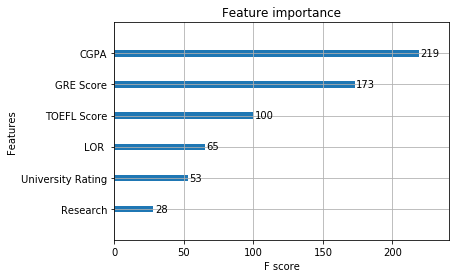

In [20]:
from xgboost import XGBRegressor
XGBreg=XGBRegressor()
XGBreg.fit(X_train,Y_train)
xgboost.plot_importance(XGBreg)
plt.show()

In [21]:
predictions=XGBreg.predict(X_test)
from sklearn.metrics import r2_score
R2=r2_score(Y_test,predictions)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_test,predictions)
print(f'R-square= {round(R2*100,2)}% \nMean Squared Error= {"%.10f" %MSE}')

R-square= 77.87% 
Mean Squared Error= 0.0043658843


In [23]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(X_train,Y_train)
predictions = rfr.predict(X_test) 
from sklearn.metrics import r2_score
R2=r2_score(Y_test,predictions)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_test,predictions)
print(f'R-square= {round(R2*100,2)}% \nMean Squared Error= {"%.10f" %MSE}')

C:\Users\698243\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


R-square= 75.68% 
Mean Squared Error= 0.0047996530
